In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# We will use the AMES housing dataset by Dean De Cock

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', sep='\t') # Tab separated
# This is unnecessarily large, so let's pick out a subset of 5 variables, along wit the target
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Central Air', 'Total Bsmt SF', 'SalePrice']

df = df[columns]

# There is only one missing entry. Let's drop that row, since we have a large enough dataset
df = df.dropna(axis=0)
# Let's encode the central air conditioning variable
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})

In [ ]:
from sklearn.linear_model import LinearRegression

X = df[df.columns[df.columns != 'SalePrice']].values
y = df['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

lr = LinearRegression(n_jobs=-1);

lr.fit(X_train, y_train);

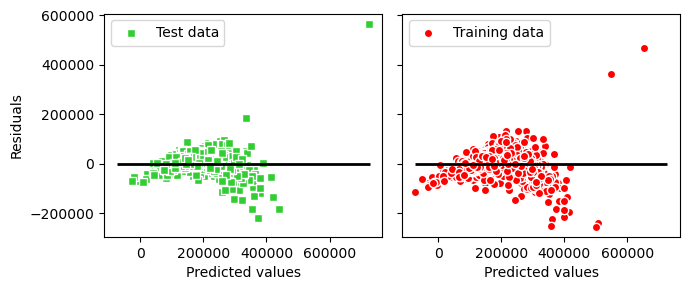

In [4]:
# We can visually inspect the residuals
prediced_train = lr.predict(X_train)
predicted_test = lr.predict(X_test)
x_max = np.max([np.max(prediced_train), np.max(predicted_test)])
x_min = np.min([np.min(prediced_train), np.min(predicted_test)])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)
ax1.scatter(predicted_test, predicted_test - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
ax2.scatter(prediced_train, prediced_train - y_train, c='red', marker='o', edgecolor='white', label='Training data')
ax1.set_ylabel('Residuals')
for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100, color='black', lw=2)
plt.tight_layout()
plt.show()

In [5]:
# Now, check the MSE
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, lr.predict(X_train))
mse_test = mean_squared_error(y_test, lr.predict(X_test))

print(f'MSE train: {mse_train:.2f}')
print(f'MSE test: {mse_test:.2f}')

MSE train: 1497216245.85
MSE test: 1516565821.00


The training MSE is slightly lower than the test MSE. This is typically an indication of overfitting or high variance, but the difference here is slight.

In [ ]:
# Now, check the MAE - this emphasizes the incorrect prediction a little less
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(y_train, lr.predict(X_train))
mae_test = mean_absolute_error(y_test, lr.predict(X_test))

print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}')

MAE train: 25983.03
MAE test: 24921.29


The model makes an error of about $25,000 on the predictions here.

However, these are both unbounded error metrics and depend on the actual scale of the datapoints. Instead, it is useful to use the $R^2$ coefficient of determination.
$$R^2 = 1 - \frac{SSE}{SST} = 1 - \frac{\sum_{i = 1}^{n} (y^{(i)} - \hat{y}^{(i)})^2}{\sum_{i = 1}^{n} (y^{(i)} - \bar{y})^2} = 1 - \frac{n \times MSE}{n \times \mathrm{Var}(y)} = 1 - \frac{ MSE}{ \mathrm{Var}(y)}$$

$R^2$ is the variance of the response. It lies in $[0,1]$ for the training data, but can become negative for the test dataset. If $R^2 = 1$, the model fits perfectly and $R^2 =0$ implies that the model explains nothing.

An $R^2$ that's negative on the test dataset implies that the model is ostensibly worse than just predicting the average of the training target. This is a sure indication of either incorrect preparation (such as forgetting to standardize or scale the test dataset) or extremized overfitting.

In [8]:
from sklearn.metrics import r2_score

train_r2 = r2_score(y_train, prediced_train)
test_r2 = r2_score(y_test, predicted_test)

print(f"R^2 train: {train_r2:.2f}")
print(f"R^2 test: {test_r2:.2f}")

R^2 train: 0.77
R^2 test: 0.75


Since the test R squared is only slightly lower, the degree of overfitting isn't too great.